In [69]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [70]:
img_array = cv2.imread("train/0/Training_3908.jpg")
type(img_array)

numpy.ndarray

In [71]:
img_array.shape

(48, 48, 3)

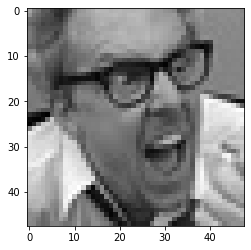

In [72]:
plt.imshow(img_array)

In [73]:
DataDirectory = "train/"

In [74]:
Classes = ["0","1","2","3","4","5","6"]

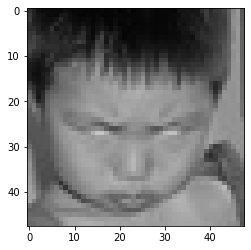

In [75]:
for category in Classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show
        break
    break

<function matplotlib.pyplot.show(close=None, block=None)>

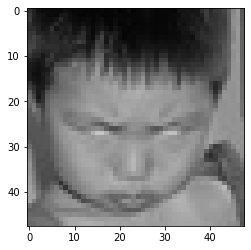

In [76]:
img_size = 224
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show

In [77]:
new_array.shape

(224, 224, 3)

In [78]:
training_data = []

def create_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size, img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass


In [79]:
create_training_data()

In [80]:
training_data

[[array([[[ 50,  50,  50],
          [ 50,  50,  50],
          [ 49,  49,  49],
          ...,
          [ 88,  88,  88],
          [ 86,  86,  86],
          [ 86,  86,  86]],
  
         [[ 50,  50,  50],
          [ 50,  50,  50],
          [ 49,  49,  49],
          ...,
          [ 88,  88,  88],
          [ 86,  86,  86],
          [ 86,  86,  86]],
  
         [[ 50,  50,  50],
          [ 50,  50,  50],
          [ 50,  50,  50],
          ...,
          [ 88,  88,  88],
          [ 86,  86,  86],
          [ 86,  86,  86]],
  
         ...,
  
         [[104, 104, 104],
          [104, 104, 104],
          [104, 104, 104],
          ...,
          [ 85,  85,  85],
          [ 83,  83,  83],
          [ 83,  83,  83]],
  
         [[104, 104, 104],
          [104, 104, 104],
          [104, 104, 104],
          ...,
          [ 85,  85,  85],
          [ 83,  83,  83],
          [ 83,  83,  83]],
  
         [[104, 104, 104],
          [104, 104, 104],
          [104, 104, 104

In [81]:
print(len(training_data))

28709


In [82]:
temp =np.array(training_data)

C:\Users\fenaz\AppData\Local\Temp\ipykernel_2128\1481338020.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp =np.array(training_data)


In [83]:
temp.shape

(28709, 2)

In [17]:
import random
random.shuffle(training_data)

In [18]:
X = [] 
y = []

for features,label in  training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
#scaler = MinMaxScaler()
#scaler.fit_transform(X)

In [21]:
Y = np.array(y)

In [22]:
X = X/255.0;

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [85]:
model =  tf.keras.applications.MobileNetV2()

In [86]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [87]:
base_input = model.layers[0].input

In [88]:
base_output = model.layers[-2].output

In [89]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [90]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_ouput)
 

In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras.Model(inputs= base_input, outputs= final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [33]:
new_model.compile(loss='sparse_categorical_crossentropy',  optimizer ='adam', metrics= ["accuracy"])

In [34]:
X.shape

(28709, 224, 224, 3)

In [35]:
Y

array([5, 4, 0, ..., 5, 4, 4])

In [36]:
#new_model.fit(X,Y, epochs=15)

In [37]:
#new_model.save("Moddel.h5") 

In [38]:
from tensorflow.keras.models import load_model

In [91]:
new_model = load_model("Moddel.h5")

In [221]:
frame = cv2.imread("happy.jpg") #Testing  a random photo

In [222]:
#img_bytes = file.read("20220801_141014.jpg")

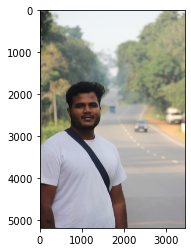

In [223]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

## Face detection

In [224]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [225]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [226]:
gray.shape

(5184, 3456)

In [227]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
face_roi = 0
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y),(x+w, y+h),(255,0,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("No Faces Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            print("RUNNING")
            face_roi = roi_color[ey: ey+eh, ex:ex+ ew]

RUNNING
No Faces Detected


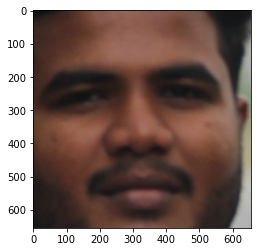

In [228]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [229]:
print(face_roi)

[[[ 19  19  19]
  [ 18  18  18]
  [ 20  20  20]
  ...
  [ 29  27  26]
  [ 26  27  25]
  [ 27  28  26]]

 [[ 20  20  20]
  [ 19  19  19]
  [ 20  20  20]
  ...
  [ 27  28  26]
  [ 27  28  26]
  [ 28  29  27]]

 [[ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]
  ...
  [ 27  28  26]
  [ 27  28  26]
  [ 29  30  28]]

 ...

 [[ 26  26  26]
  [ 25  25  25]
  [ 25  24  26]
  ...
  [178 178 178]
  [176 177 175]
  [177 178 176]]

 [[ 25  25  25]
  [ 26  26  26]
  [ 26  25  27]
  ...
  [175 175 175]
  [176 177 175]
  [177 178 176]]

 [[ 25  25  25]
  [ 25  25  25]
  [ 26  26  26]
  ...
  [176 174 174]
  [175 176 174]
  [176 177 175]]]


In [230]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image, axis=0) #fourth dimension
final_image = final_image/ 255.0 #normalizing

In [231]:
final_image.shape

(1, 224, 224, 3)

In [232]:
final_image_prediction  = new_model.predict(final_image)

1/1 [==============================] - 0s 47ms/step


In [233]:
np.argmax(final_image_prediction) # 5 == Sad

4

## Realtime Video

In [181]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#set the rectangle bg to white
rectange_bgr = (255,255,255)
#make a black image
img = np.zeros((500,500))
#set some text
text = "Some text in a box"
#get the width  and height of the text box
(text_width, text_height) = cv2.getTextSize(text, font,  fontScale= font_scale, thickness=1)[0]

#set text start position
text_offset_x = 10
text_offset_y = img.shape[0] - 25

#make the coords of the box with a small padding
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectange_bgr,  cv2.FILLED)
cv2.putText(img,text ,(text_offset_x, text_offset_y), font, fontScale = font_scale, color=(0,0,0), thickness = 1)

cap = cv2.VideoCapture(1)
#Checking if webcam is opened
if not cap.isOpened():
    cap = cap.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y),(x+w, y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("No Faces Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex+ ew] #cropping
    
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image, axis=0) #fourth dimension
    final_image = final_image/ 255.0 #normalizing
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    
      
  
    if(np.argmax(Predictions) == 0):
        status = "Angry"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))
    
    elif (np.argmax(Predictions) == 1):
        status = "Disgust"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))      
    
    elif (np.argmax(Predictions) == 2):
        status = "Fear"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))    
    
    elif (np.argmax(Predictions) == 3):
        status = "Happy"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))    
        
    elif (np.argmax(Predictions) == 4):
        status = "Sad"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))          
        
    elif (np.argmax(Predictions) == 5):
        status = "Angry"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))   
    
    elif (np.argmax(Predictions) == 6):
        status = "Surprise"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255))    

    else:
        status = "Neutral"
        x1,y1,w1,h1 =  0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1 + w1, y1 + h1), (0,0,0), -1) #Black background rectangle
        cv2.putText(frame, status, (x1 +int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
        cv2.putText(frame, status,(100,  150), font, 3, (0,0,255),2 , cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,0,255)) 

    cv2.imshow('Face Emotion', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 65ms/step
No Faces Detected
1/1 [==============================] - 0s 64ms/step
No Faces Detected
1/1 [==============================] - 0s 68ms/step
No Faces Detected
1/1 [==============================] - 0s 65ms/step
No Faces Detected
No Faces Detected
1/1 [==============================] - 0s 67ms/step
No Faces Detected
1/1 [==============================] - 0s 54ms/step
No Faces Detected
1/1 [==============================] - 0s 52ms/step
No Faces Detected
1/1 [==============================] - 0s 51ms/step
No Faces Detected
1/1 [==============================] - 0s 49ms/step
No Faces Detected
1/1 [==============================] - 0s 46ms/step
No Faces Detected
1/1 [==============================] - 0s 46ms/step
No Faces Detected
1/1 [==============================] - 0s 44ms/step
No Faces Detected
1/1 [==============================] - 0s 45ms/step
No Faces Detected
1/1 [==============================] - 0s 44ms/step
No Faces Detected
No

1/1 [==============================] - 0s 51ms/step
No Faces Detected
1/1 [==============================] - 0s 50ms/step
No Faces Detected
1/1 [==============================] - 0s 47ms/step
